# Statistical Inference on PM2.5 Concentrations in China from 2013 to 2015

## Authors: Tsun Li Nicholas Tam, Camila Dall Bello, Leon Zhang

## Group: 46

## 1. Introduction
### 1.1. Background Information
For years, substantial parts of China have suffered from chronic air pollution. The main pollutants are PM2.5, referring to tiny particles in the air with aerodynamic diameters of $2.5$ micrometers ($2.5 \mu m$) or less. PM2.5 consists of a complex mixture of solids and aerosols, with particles containing various organic and inorganic compounds. (Inhalable Particulate Matter and Health (PM2.5 and PM10)) 

The presence of high concentrations of PM2.5 in China has negatively influenced climate, visibility, and human health. In 2013, in an attempt to reduce air pollution, the Chinese government issued the 2013-2017 Clear Air Action Plan, aiming to significantly reduce concentrations of PM2.5 in China by 2017. (Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E., 2015)

### 1.2. Dataset and Project Question
For our research project, we have selected datasets of hourly observations of PM2.5 concentrations in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang, along with other meteorological data for each city,from 1-1-2013 to 12-31-2015. These datasets were retrieved from the [PM2.5 Data of Five Chinese Cities Data Set](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) from UCI machine learning repository, and converted from a singular RAR file to CSV files online. 

Our project question is: 
#### "Given the sample data for cities in China, is there a significant decrease in PM2.5 concentration in the cities in China between 2013 and 2015?" 

Given the project question, let $\mu_{2013}$ and $\mu_{2015}$ be the mean PM2.5 concentration in 2013 and 2015 respectively, and let $\sigma_{2013}$ and $\sigma_{2015}$ be the standard deviation of the PM2.5 concentration in 2013 and 2015 respectively, with all values measured in $g/m^3$. The following hypothesis tests will be conducted: 

Hypothesis test 1:
$$H_0: \mu_{2013} = \mu_{2015}$$ 
$$H_1: \mu_{2013} > \mu_{2015}$$

Hypothesis test 2:
$$H_0: \sigma_{2013} = \sigma_{2015}$$ 
$$H_1: \sigma_{2013} \neq \sigma_{2015}$$

The differences in standard deviation for each location are tested to inform us of whether or not comparing the differences in means for each location is a reliable method for our investigation. For instance, if there is a significant difference in both the mean and standard deviation of PM2.5 concentrations, then the comparison of PM2.5 concentrations may be difficult due to differing distributions of data.

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [1]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
# library(digest) 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merge them into a single dataframe called `total_PM2.5_AV`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing cities in China.
- The measurements in each of the original datasets contain values for PM2.5 concentrations in 3 separate locations within each city. For the sake of simplicity, the values have been averaged together into a single column, `PM_2.5_AV`, for each city.

In [2]:
# Preparing URLs
beijing_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/BeijingPM20100101_20151231.csv")
shanghai_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShanghaiPM20100101_20151231.csv")
chengdu_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ChengduPM20100101_20151231.csv")
guangzhou_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/GuangzhouPM20100101_20151231.csv")
shenyang_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShenyangPM20100101_20151231.csv")

# Preparing datasets
beijing_PM2.5_AV <- beijing_PM2.5 %>% 
    filter(!is.na(PM_Dongsi), !is.na(PM_Dongsihuan), !is.na(PM_Nongzhanguan)) %>% 
    mutate(PM_2.5_AV = (PM_Dongsi + PM_Dongsihuan + PM_Nongzhanguan) / 3) %>% 
    mutate(location = "Beijing") %>% 
    select(location, year, PM_2.5_AV) 
# head(beijing_PM2.5_AV)

shanghai_PM2.5_AV <- shanghai_PM2.5 %>% 
    filter(!is.na(PM_Jingan), !is.na(PM_US.Post), !is.na(PM_Xuhui)) %>% 
    mutate(PM_2.5_AV = (PM_Jingan + PM_US.Post + PM_Xuhui) / 3) %>% 
    mutate(location = "Shanghai") %>% 
    select(location, year, PM_2.5_AV)
# head(shanghai_PM2.5_AV)

chengdu_PM2.5_AV <- chengdu_PM2.5 %>% 
    filter(!is.na(PM_Caotangsi), !is.na(PM_Shahepu), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_Caotangsi + PM_Shahepu + PM_US.Post) / 3) %>% 
    mutate(location = "Chengdu") %>% 
    select(location, year, PM_2.5_AV)
# head(chengdu_PM2.5_AV)

guangzhou_PM2.5_AV <- guangzhou_PM2.5 %>% 
    filter(!is.na(PM_City.Station), !is.na(PM_5th.Middle.School), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_City.Station + PM_5th.Middle.School + PM_US.Post) / 3) %>% 
    mutate(location = "Guangzhou") %>% 
    select(location, year, PM_2.5_AV)
# head(guangzhou_PM2.5_AV)

shenyang_PM2.5_AV <- shenyang_PM2.5 %>% 
    filter(!is.na(PM_Taiyuanjie), !is.na(PM_US.Post), !is.na(PM_Xiaoheyan)) %>% 
    mutate(PM_2.5_AV = (PM_Taiyuanjie + PM_US.Post + PM_Xiaoheyan) / 3) %>% 
    mutate(location = "Shenyang") %>% 
    select(location, year, PM_2.5_AV)
# head(shenyang_PM2.5_AV)

# Merging datasets
total_PM2.5_AV <- rbind(beijing_PM2.5_AV, shanghai_PM2.5_AV, chengdu_PM2.5_AV, guangzhou_PM2.5_AV, shenyang_PM2.5_AV) 

head(total_PM2.5_AV)

,location,year,PM_2.5_AV
,<chr>,<int>,<dbl>
1,Beijing,2013,141.0000
2,Beijing,2013,149.3333
3,Beijing,2013,147.3333
4,Beijing,2013,118.0000
5,Beijing,2013,113.6667
6,Beijing,2013,173.3333


_Table 1: Initial dataset for all required data_

### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of PM 2.5 concentrations
- Histograms have been selected to display the sampling distribution of PM 2.5 concentrations in each city for 2013 and 2015, to allow easier observation of spread and centre of data.
- Outlier values that exceed $250 \mu g/m^3$ have been omitted to allow a clearer display of the sample distribution.
- The majority of the distributions are skewed to the right.
- The distributions for Beijing in 2013 and Guangzhou in 2015 are multimodal, while the remaining distributions are unimodal.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Removed 768 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 599 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


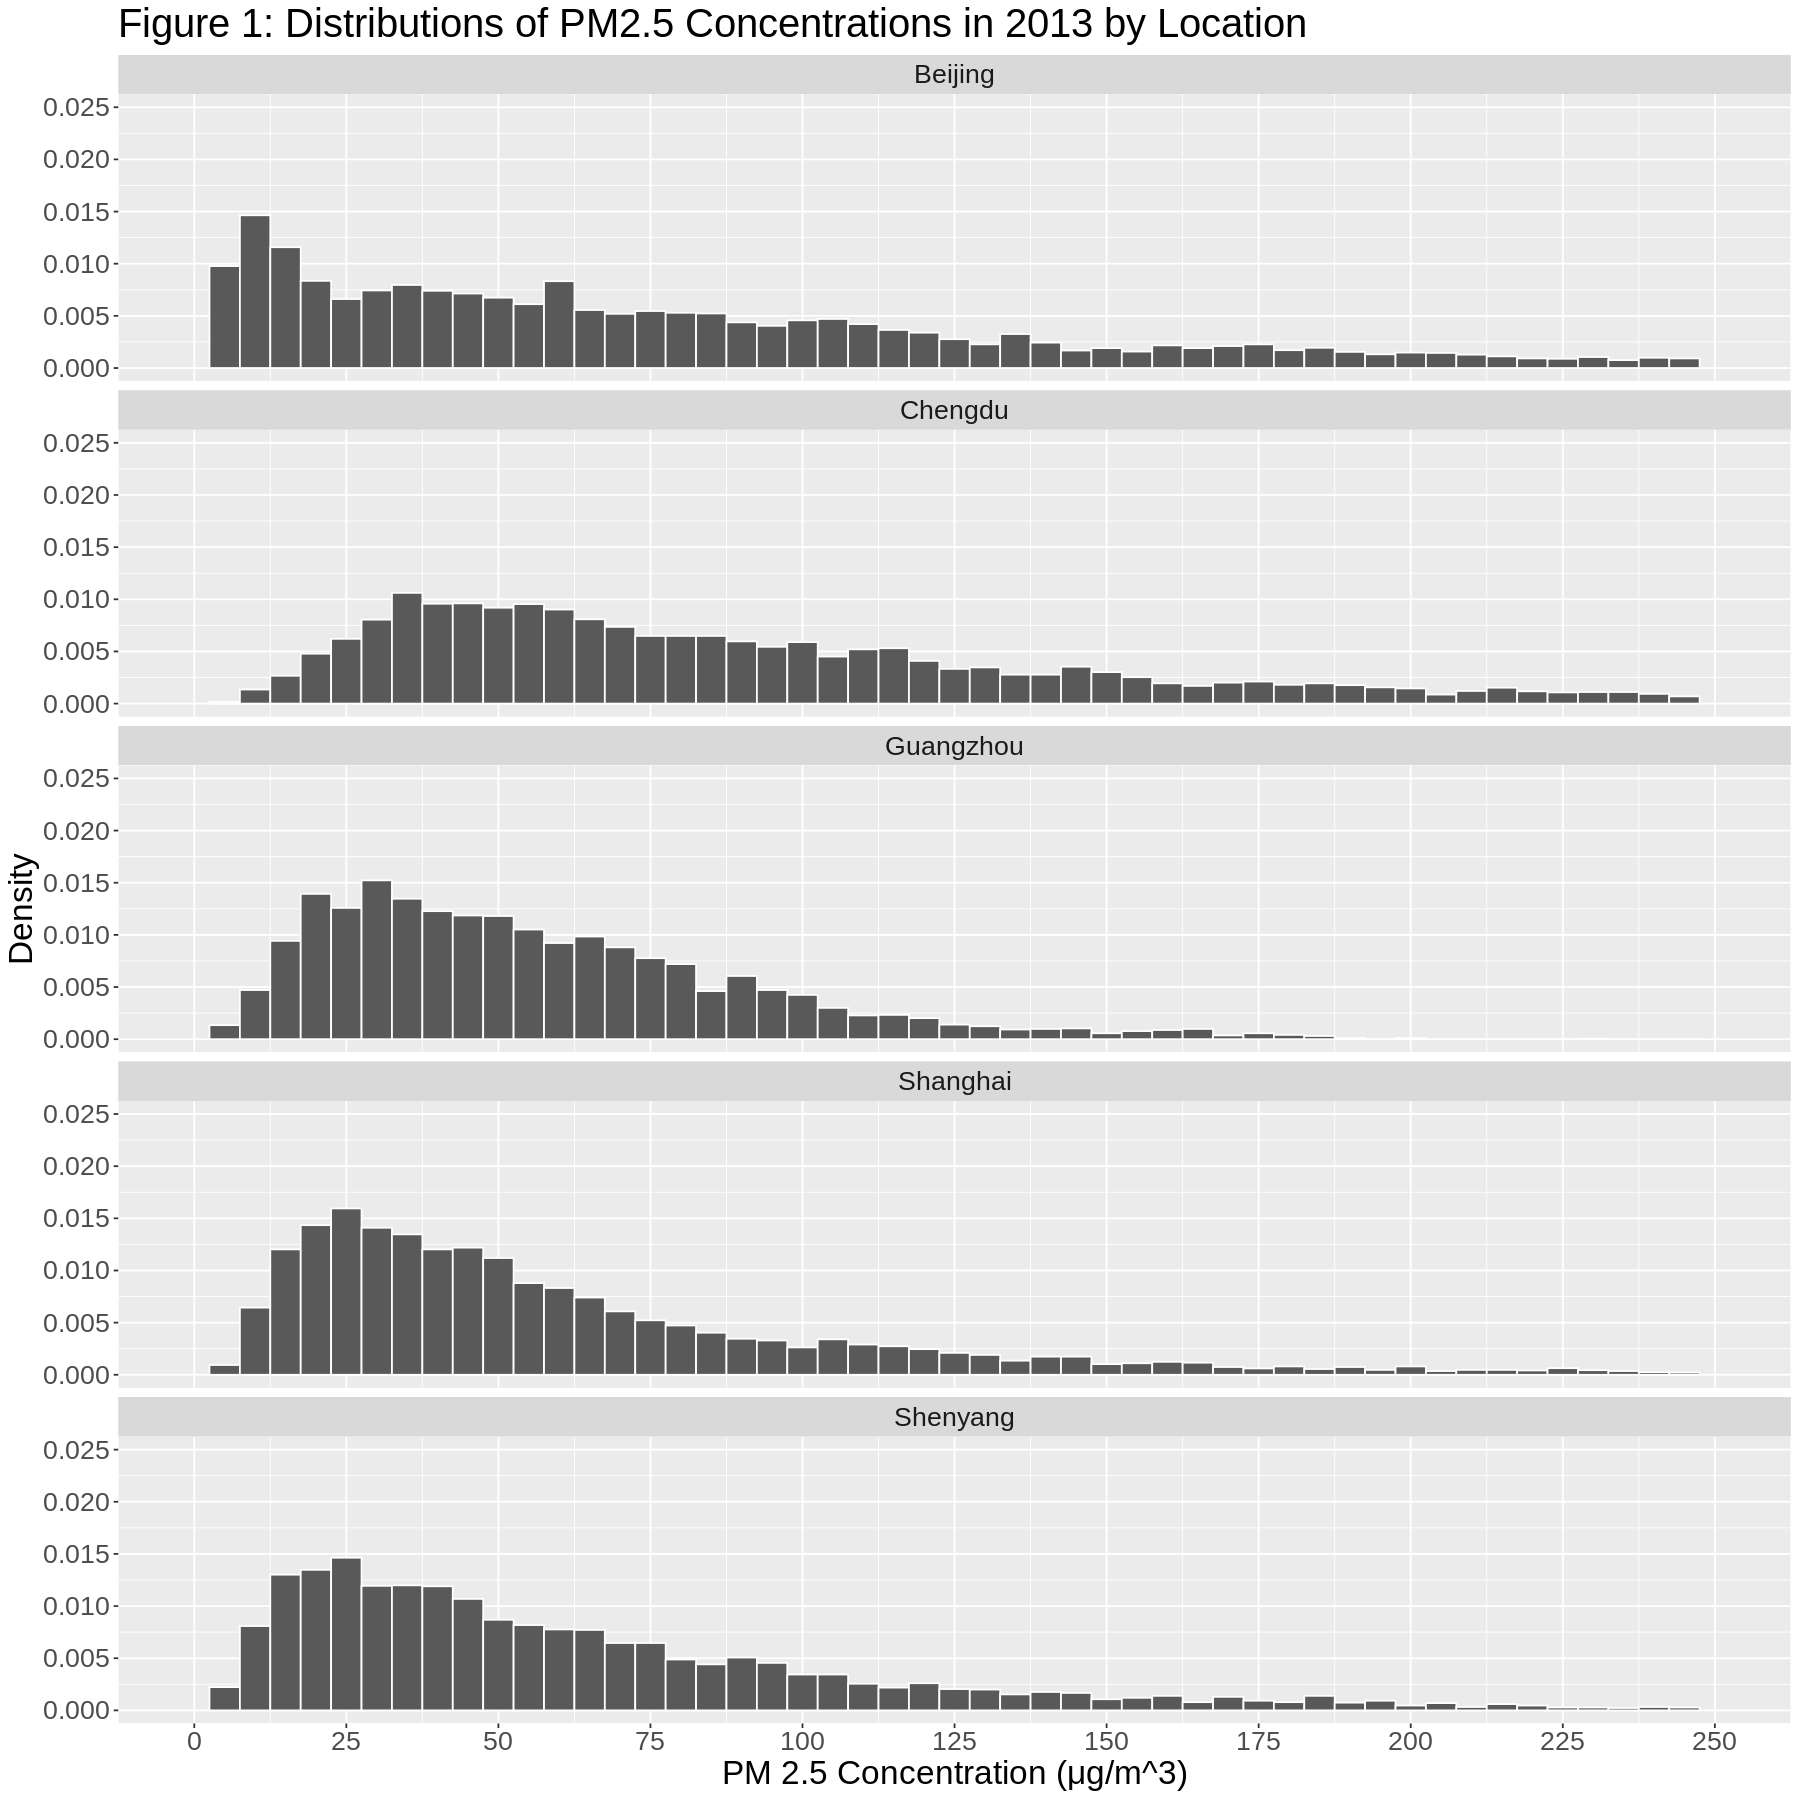

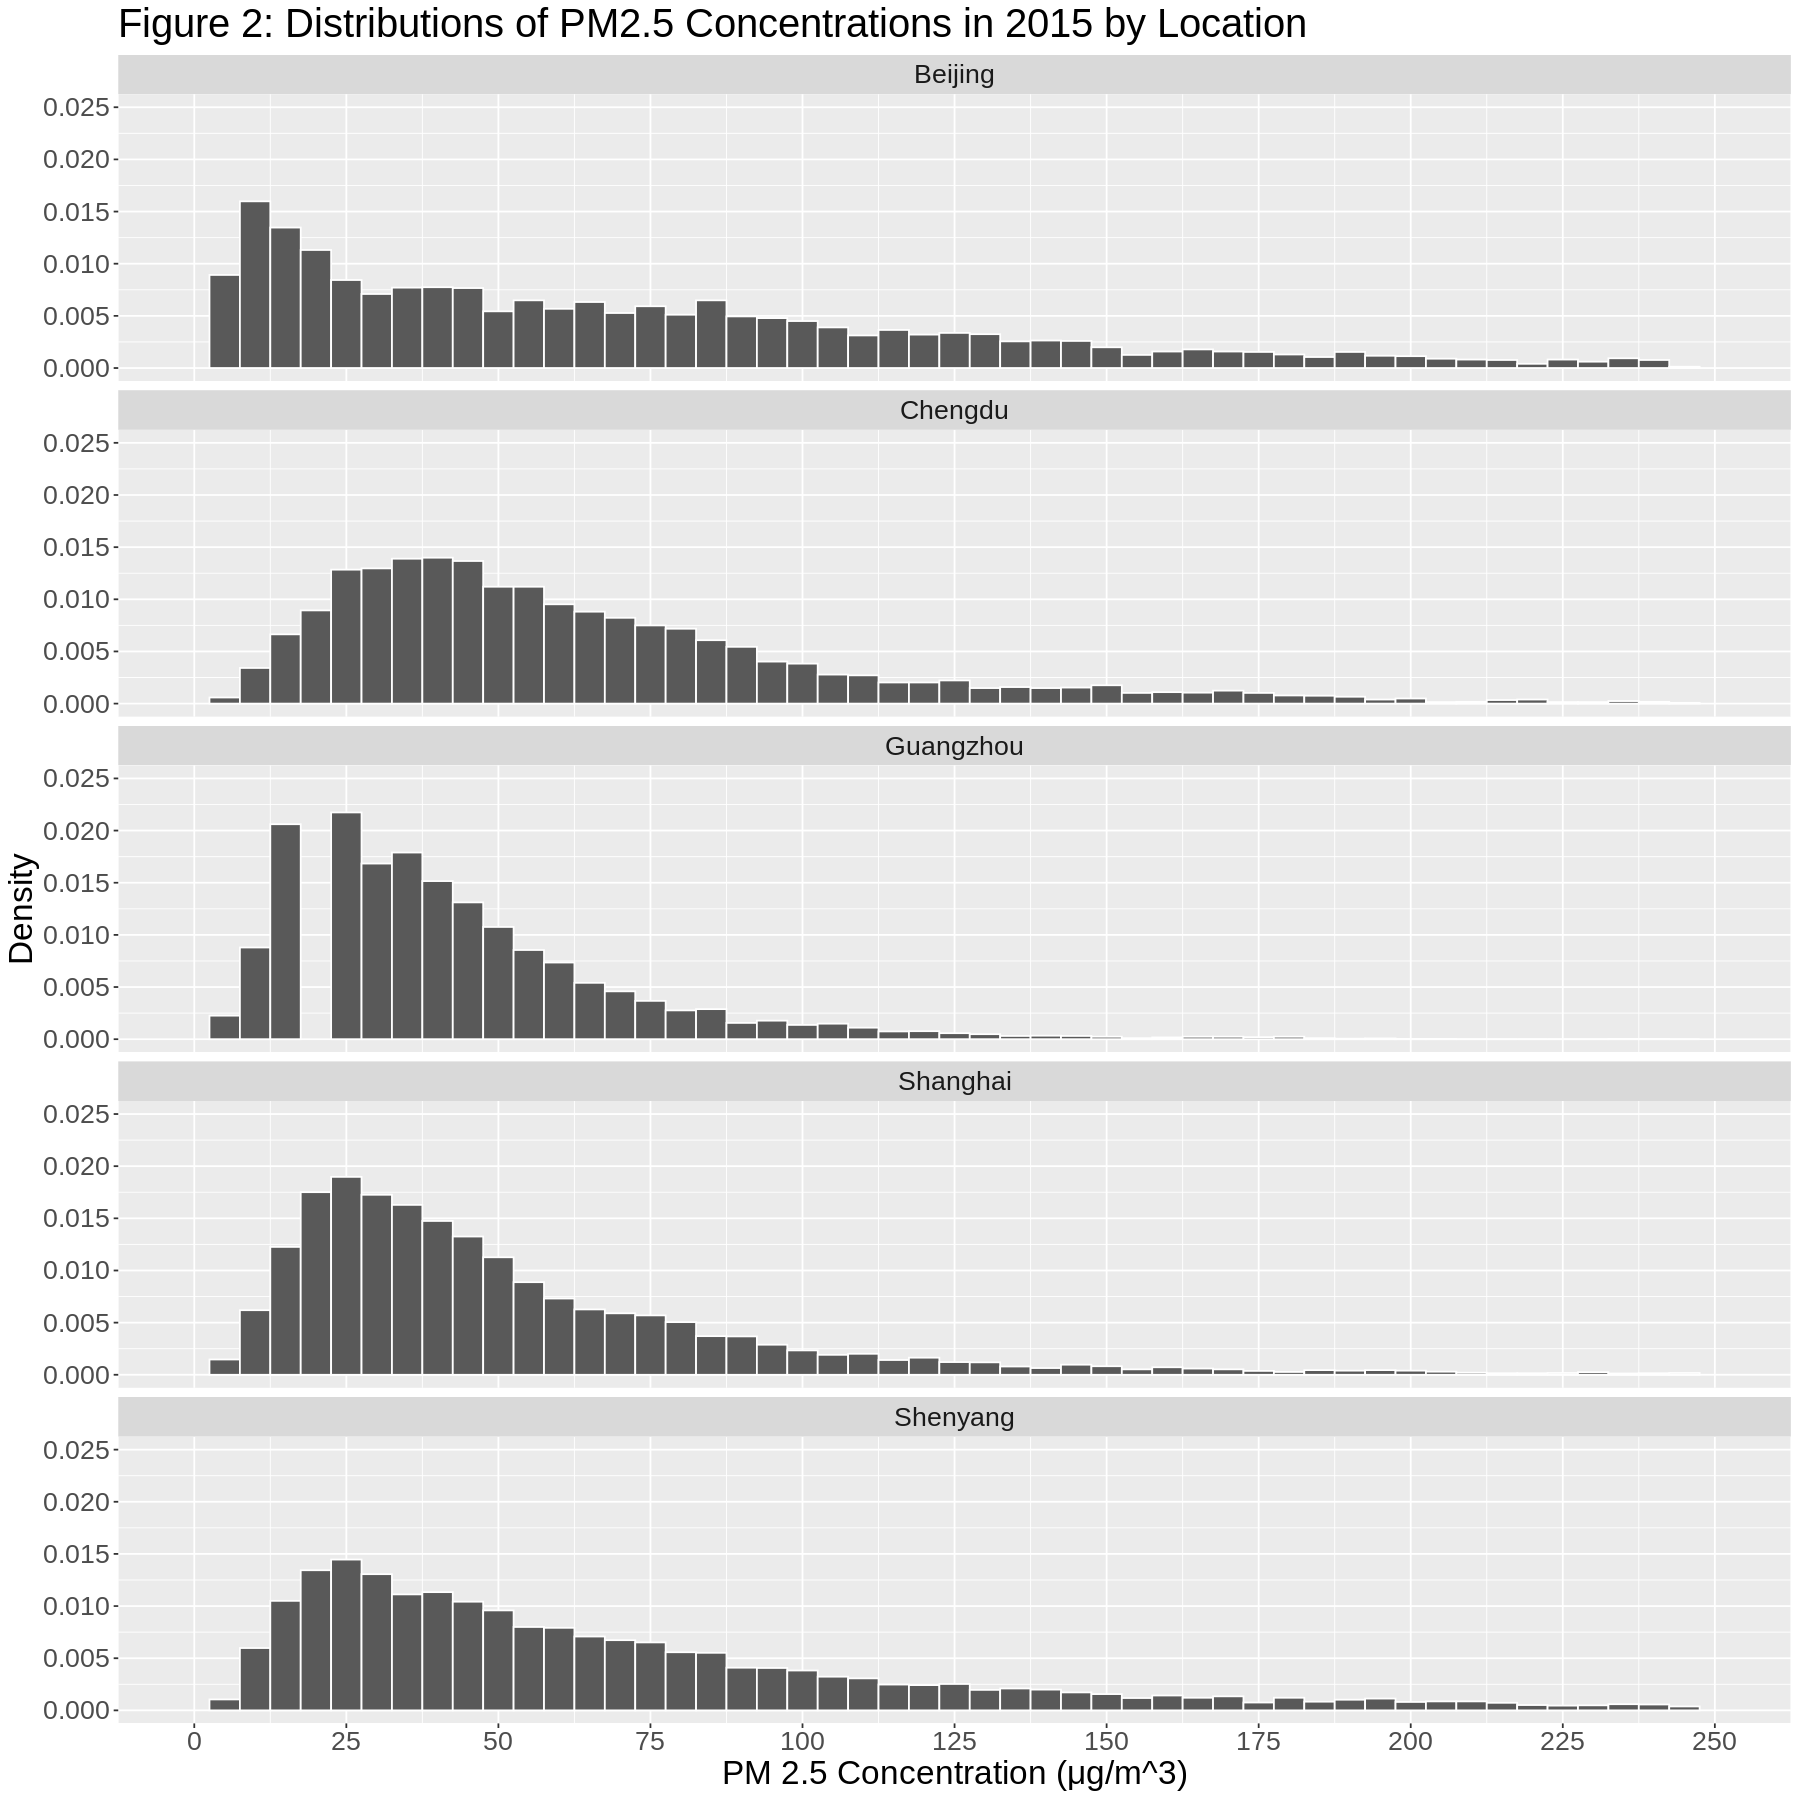

In [3]:
options(repr.plot.width = 15, repr.plot.height = 15)

# Distribution of PM 2.5 concentrations for each location in 2013 
dist_total_2013 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2013") %>% 
    filter(year == 2013) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) +
    ggtitle("Figure 1: Distributions of PM2.5 Concentrations in 2013 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2013

# Distribution of PM 2.5 concentrations for each location in 2015 
dist_total_2015 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2015") %>% 
    filter(year == 2015) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) + 
    ggtitle("Figure 2: Distributions of PM2.5 Concentrations in 2015 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2015

#### 2.3.2. Boxplots of PM2.5 concentrations
<!-- - The boxplots below display the general information on the overall population. -->
<!-- - The majority of values do not exceed $150 \mu g/m^3$. -->
- The first boxplot has values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. 
<!-- - There exist outlier values of up to $1150 \mu g/m^3$, with values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. -->

Warning message:
“Removed 109 rows containing non-finite values (`stat_boxplot()`).”


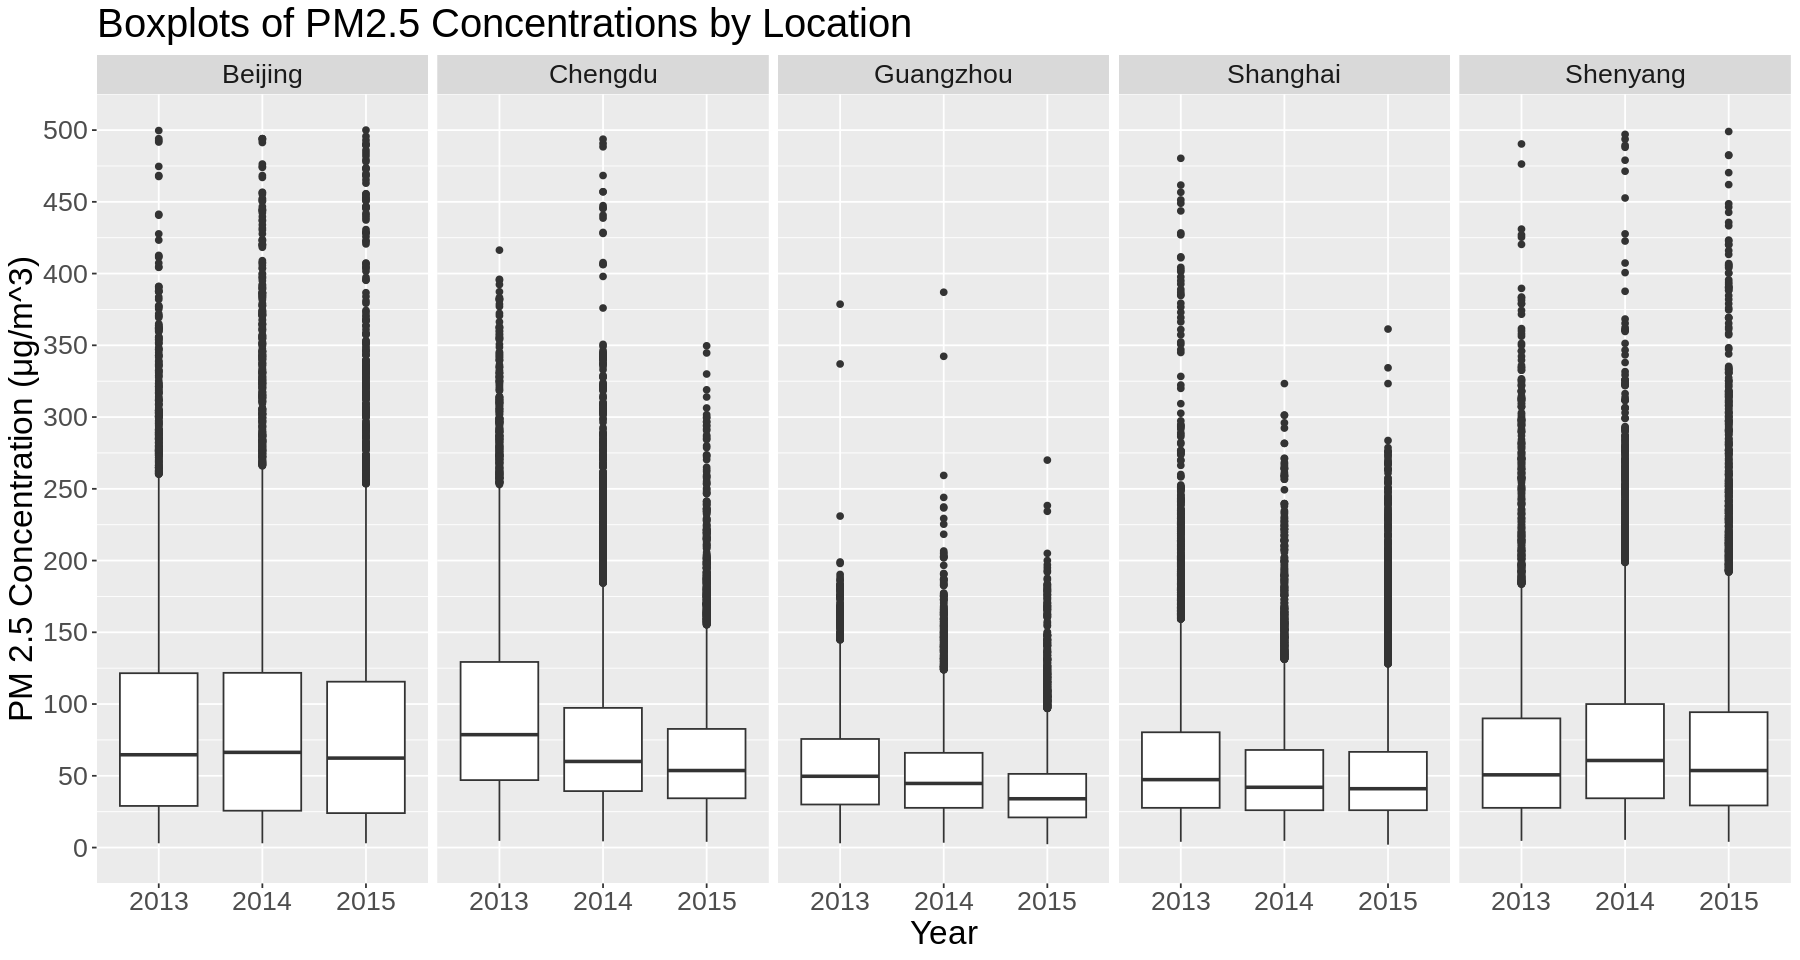

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Boxplots of PM2.5 Concentrations by Location
box_total <- total_PM2.5_AV %>% 
    mutate(year = as.character(year)) %>%
    mutate(PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "PM 2.5 Concentration (μg/m^3)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) +
    scale_y_continuous(limits = c(0, 500), breaks = seq(0, 500, by = 50))
box_total

- Due to the data containing extreme outlier values of up to $1150 \mu g/m^3$, a separate boxplot set to a logarithmic scale of base $e$ is made to display the differences between groups.

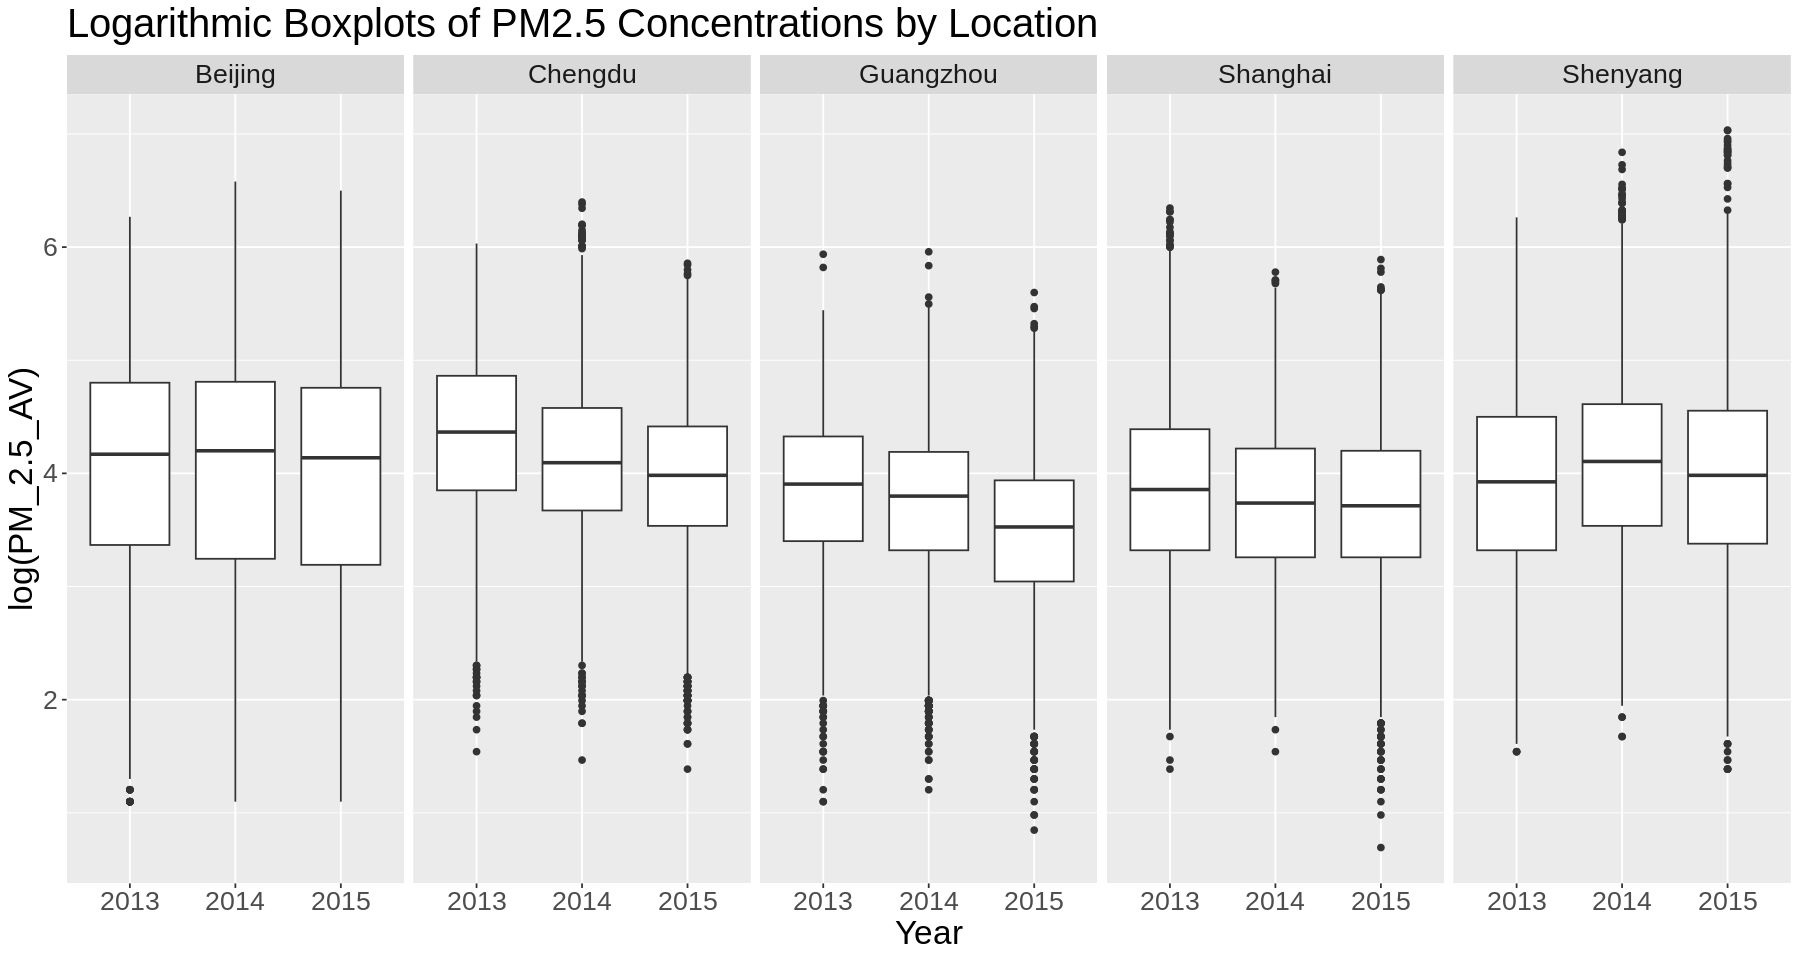

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Logarithmic Boxplots of PM2.5 Concentrations by Location
box_total_log <- total_PM2.5_AV %>% 
    mutate(year = as.character(year), PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV_log)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "log(PM_2.5_AV)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Logarithmic Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) 
box_total_log

### 2.4. Data on overall population
The data below consists of summary data for the overall population: 
<!-- - `total_PM2.5_AV_pop_data`: For each location and each year between 2013 and 2015, the following data are measured: 
    - Mean of the PM2.5 concentration values (`PM2.5_mean`)
    - Standard deviation of the PM2.5 concentration values (`PM2.5_sd`)
    - Median of the PM2.5 concentration values (`PM2.5_median`)
    - Number of values (`n`) -->
- `total_PM2.5_AV_pop_data`: For each location and each year between 2013 and 2015, the mean (`PM2.5_mean`), standard deviation (`PM2.5_sd`), median (`PM2.5_median`) and quantity (`n`) of PM2.5 concentration values are measured
- `total_PM2.5_AV_mean_diff_obs`: Differences in mean PM2.5 concentration between 2013 and 2015 as test statistics for hypothesis test 1 for each location.
- `total_PM2.5_AV_sd_diff_obs`: Differences in PM2.5 concentration standard deviation between 2013 and 2015 as test statistics for hypothesis test 2 for each location.

In [6]:
# Count number of each combination of year and location
countChinaDates <- total_PM2.5_AV %>% 
    group_by(location, year) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
    filter(year != 2014) %>% 
    group_by(location, year) %>% 
    summarize(
        PM2.5_mean = mean(PM_2.5_AV), 
        PM2.5_sd = sd(PM_2.5_AV), 
        PM2.5_median = median(PM_2.5_AV)
    ) %>% 
    inner_join(countChinaDates) 
# %>% 
#     pivot_wider(names_from = c(location, year), values_from = c(PM2.5_mean, PM2.5_sd, n))

# total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
#     group_by(location, year) %>% 
#     summarize(PM2.5_mean = mean(PM_2.5_AV)) %>% 
#     inner_join(countChinaDates)
total_PM2.5_AV_pop_data

# Point estimates of differences in mean PM2.5 concentrations for each combination of location and year
total_PM2.5_AV_mean_diff_obs <- tibble(
    BJ_PM2.5_mean_diff_obs = total_PM2.5_AV_pop_data$PM2.5_mean[1] - total_PM2.5_AV_pop_data$PM2.5_mean[2], 
    CD_PM2.5_mean_diff_obs = total_PM2.5_AV_pop_data$PM2.5_mean[3] - total_PM2.5_AV_pop_data$PM2.5_mean[4],
    GZ_PM2.5_mean_diff_obs = total_PM2.5_AV_pop_data$PM2.5_mean[5] - total_PM2.5_AV_pop_data$PM2.5_mean[6],
    SH_PM2.5_mean_diff_obs = total_PM2.5_AV_pop_data$PM2.5_mean[7] - total_PM2.5_AV_pop_data$PM2.5_mean[8],
    SY_PM2.5_mean_diff_obs = total_PM2.5_AV_pop_data$PM2.5_mean[9] - total_PM2.5_AV_pop_data$PM2.5_mean[10],
)

# Point estimates of differences in PM2.5 concentration standard deviations for each combination of location and year
total_PM2.5_AV_sd_diff_obs <- tibble(
    BJ_PM2.5_sd_diff_obs = total_PM2.5_AV_pop_data$PM2.5_sd[1] - total_PM2.5_AV_pop_data$PM2.5_sd[2], 
    CD_PM2.5_sd_diff_obs = total_PM2.5_AV_pop_data$PM2.5_sd[3] - total_PM2.5_AV_pop_data$PM2.5_sd[4],
    GZ_PM2.5_sd_diff_obs = total_PM2.5_AV_pop_data$PM2.5_sd[5] - total_PM2.5_AV_pop_data$PM2.5_sd[6],
    SH_PM2.5_sd_diff_obs = total_PM2.5_AV_pop_data$PM2.5_sd[7] - total_PM2.5_AV_pop_data$PM2.5_sd[8],
    SY_PM2._sd_diff_obs = total_PM2.5_AV_pop_data$PM2.5_sd[9] - total_PM2.5_AV_pop_data$PM2.5_sd[10],
)

total_PM2.5_AV_mean_diff_obs

total_PM2.5_AV_sd_diff_obs

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.
Joining with `by = join_by(location, year)`


location,year,PM2.5_mean,PM2.5_sd,PM2.5_median,n
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
Beijing,2013,87.36825,77.58735,64.66667,6367
Beijing,2015,86.92798,87.29696,62.66667,5235
Chengdu,2013,98.31510,69.02849,78.66667,6032
Chengdu,2015,65.18370,44.51713,53.66667,8229
Guangzhou,2013,56.99301,35.61265,49.66667,3863
Guangzhou,2015,40.59729,27.67423,34.00000,8327
Shanghai,2013,63.99229,55.21316,47.33333,7309
Shanghai,2015,52.87839,40.83099,41.00000,8072
Shenyang,2013,70.33401,63.88846,50.66667,4439


BJ_PM2.5_mean_diff_obs,CD_PM2.5_mean_diff_obs,GZ_PM2.5_mean_diff_obs,SH_PM2.5_mean_diff_obs,SY_PM2.5_mean_diff_obs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4402683,33.1314,16.39572,11.11391,-6.349945


BJ_PM2.5_sd_diff_obs,CD_PM2.5_sd_diff_obs,GZ_PM2.5_sd_diff_obs,SH_PM2.5_sd_diff_obs,SY_PM2._sd_diff_obs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-9.709605,24.51136,7.938422,14.38217,-15.88294


## 3. Methods: Plan

The dataset used in this report contains measurements for PM2.5 concentrations in specific places within each city and for each hour. This allows for potential variations in PM2.5 concentrations depending on location and time to be accounted for. This report provides information about the distribution of PM2.5 concentrations through histograms and boxplots, as well as test statistics for the differences in mean PM2.5 concentrations between 2013 and 2015 for each location, providing an idea of what difference measurements are to be expected. 

So far, we have examined the difference in air quality between 2013 and 2015 for 5 cities in China. However, we cannot know with our preliminary results if the calculated differences are statistically significant. For our results to be more trustworthy, the following would be implemented in future steps of this study:
- Bootstrap sampling distributions of mean differences with central limit theorem
- Bootstrap sampling distributions of difference in standard deviations with central limit theorem
- Hypothesis tests with 0.05 significance level (z-test and t-test)
- 95% confidence intervals by both bootstrapping and by central limit theorem
Null model formed using test statistics

As a result of the policy intervention, we anticipate a substantial improvement in the air quality of at least three out of the five cities in our study (i.e., a majority of the cities). This improvement would be reflected in a significant reduction in PM2.5 levels, indicating that the policy has effectively addressed the air quality issues in these cities.

Our study aims to provide an understanding of the real-life impacts of air quality policies. By highlighting the severe health and environmental consequences of poor air quality, our study can drive the development of more targeted and effective policies to improve air quality.

The study has the potential to address key questions that could help shape future policy decisions, including:
- How can policymakers create more effective policies to improve air quality in China?
- In what ways can policymakers continue to improve air quality, given the success or failure of current policies?
- Can the policies implemented in China be scaled and replicated in other cities or countries?

### 3.1. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for Mean differences
- Bootstrap sampling distribution of mean differences is obtained by using `infer` package.
    - The original sample is used as an estimate of the overall population. 
    - Bootstrap samples are created by sampling from the original sample with replacement.
        - Each bootstrap sample is equal to the original sample size.
    - Bootstrapping is repeated 1000 times to obtain 1000 separate bootstrap samples. 
    - The point estimate (Sample mean) is calculated for each replicated bootstrap sample to obtain a bootstrap sampling distribution of the estimate.
- 95% confidence interval of differences in means by bootstrapping is obtained using `get_confidence_interval()`.
- `shade_confidence_interval()` is used on the plot to visualise the 95% confidence interval of differences in means.
- Each bootstrapping of mean differences, along with obtaining their corresponding confidence intervals and plots, is applied separately for each location.

replicate,stat
<int>,<dbl>
1,-1.0726616
2,0.1219745
3,0.1020777
4,-1.2019103
5,0.7172578
6,2.0717865


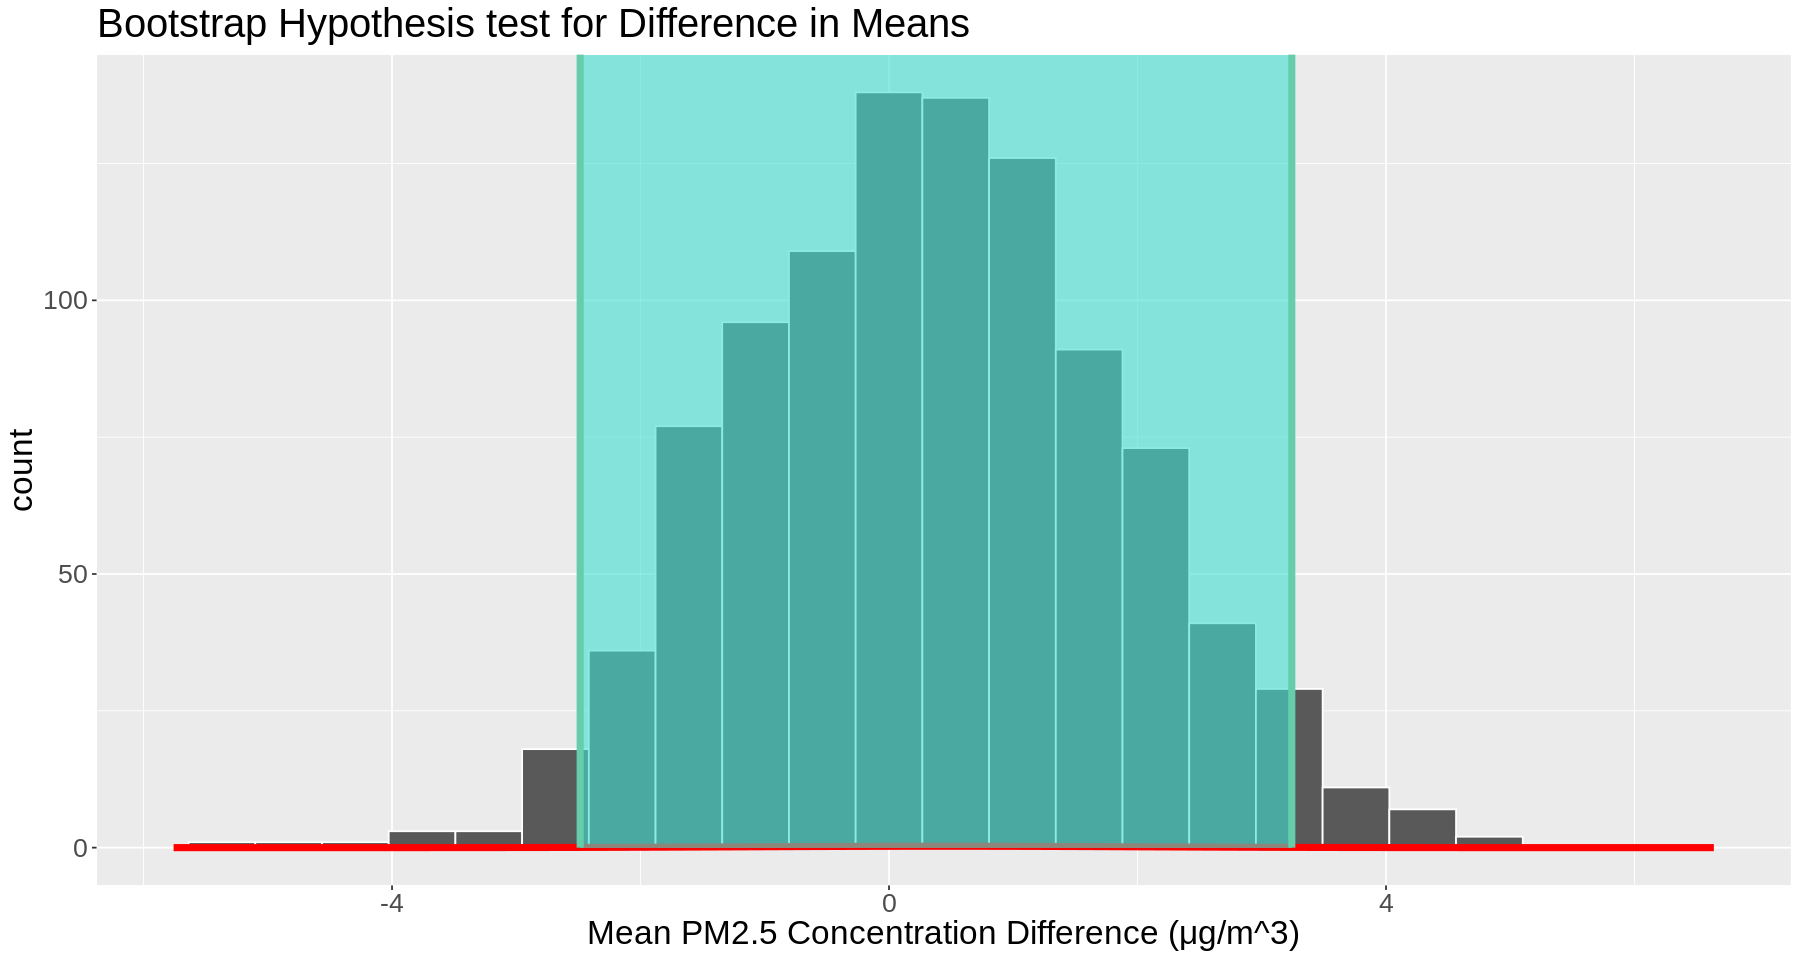

In [7]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Set seed for consistent results
set.seed(46201)

## BEIJING
# Bootstrap samples for mean differences in Beijing
BJ_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))
head(BJ_boot_diff_in_means)

# Standard error for point estimate  
BJ_ptes_se <- sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[1])^2/(total_PM2.5_AV_pop_data$n[1]) + (total_PM2.5_AV_pop_data$PM2.5_sd[2])^2/(total_PM2.5_AV_pop_data$n[2]))

# Normal distribution
BJ_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs - 4 * BJ_ptes_se, 
                total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs + 4 * BJ_ptes_se, 0.0001),
        density = dnorm(x, total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs, BJ_ptes_se)
    )
# BJ_clt_samp_dist

# BJ_clt_samp_dist <- 
#     tibble(
#         x = seq(total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs - 4 * BJ_ptes_se, 
#                 total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs + 4 * BJ_ptes_se, 0.0001),
#         density = dnorm(x, total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs, BJ_ptes_se)
#     )

# 95% confidence interval obtained from BJ_boot_diff_in_means
BJ_boot_diff_in_means_ci <- BJ_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile")
# BJ_boot_diff_in_means_ci

BJ_boot_diff_in_means_plot <- BJ_boot_diff_in_means %>%
    visualize(bins = 20) + 
    # shade_p_value(obs_stat = BJ_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis test for Difference in Means") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = BJ_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = BJ_boot_diff_in_means_ci) + 
    theme(text = element_text(size=20))
BJ_boot_diff_in_means_plot

### 3.2. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for differences in Standard Deviation
- The same methods from section 3.1 are applied, with the test statistic instead being the difference in standard deviations. 
- Since `calculate()` cannot be used for difference in S.D., a similar result is achieved by obtaining bootstrap samples for S.D., then calculating the differences of the corresponding replicates. 

,stat
,<dbl>
1,-11.112893
2,-9.428873
3,-11.938796
4,-9.616647
5,-13.418079
6,-7.196432


lower_ci,upper_ci
<dbl>,<dbl>
-13.82886,-5.604282


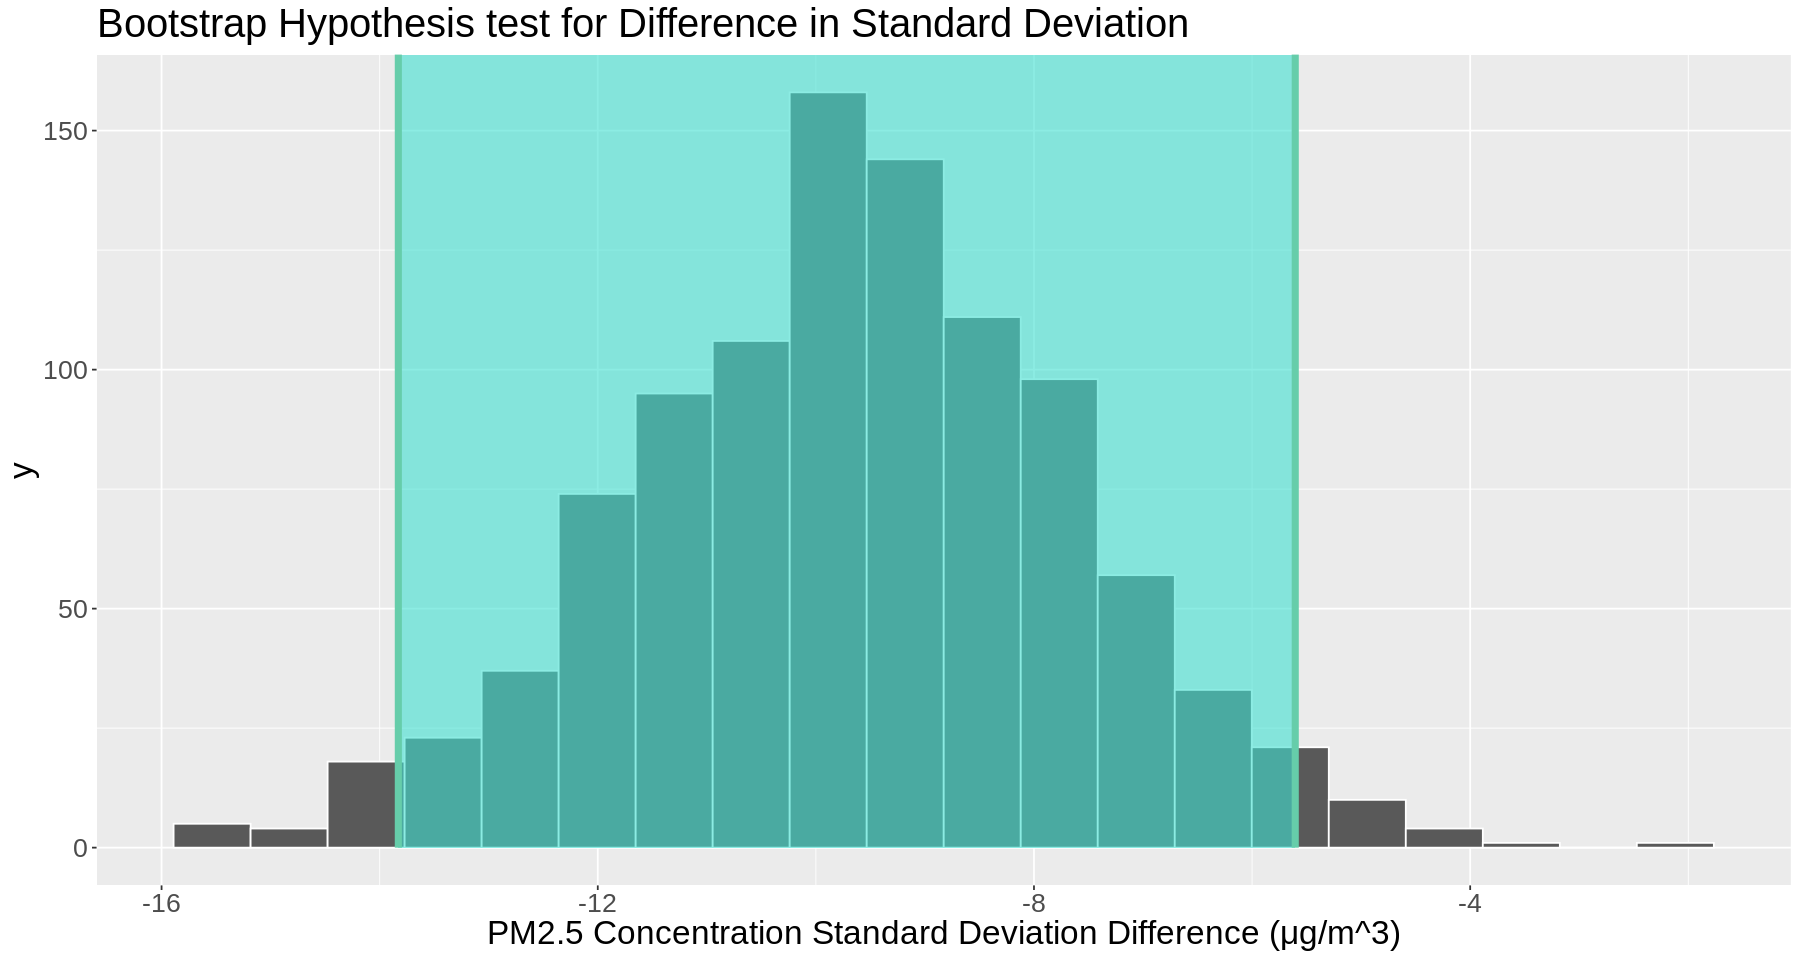

In [8]:
# Set seed for consistent results
set.seed(46201)
# Bootstrap samples for standard deviations
BJ_boot_diff_in_sd_2013 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2013) %>%
    select(PM_2.5_AV, year) %>% 
    specify(response = PM_2.5_AV) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "sd")
# head(BJ_boot_diff_in_sd_2013) 

BJ_boot_diff_in_sd_2015 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2015) %>%
    select(PM_2.5_AV, year) %>% 
    specify(response = PM_2.5_AV) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "sd")
# head(BJ_boot_diff_in_sd_2015) 

BJ_boot_diff_in_sd <- merge(BJ_boot_diff_in_sd_2013, BJ_boot_diff_in_sd_2015, by = "replicate") %>% 
    mutate(stat = stat.x - stat.y) %>% 
    select(stat)
head(BJ_boot_diff_in_sd)

BJ_boot_diff_in_sd_ci <- BJ_boot_diff_in_sd %>%
    get_confidence_interval(level = 0.95, type = "percentile")
BJ_boot_diff_in_sd_ci

options(repr.plot.width = 15, repr.plot.height = 8)
BJ_boot_diff_in_sd_plot <- 
    BJ_boot_diff_in_sd %>%
    ggplot() + 
    geom_histogram(aes(stat), bins = 20, color="white") +
    # shade_p_value(obs_stat = BJ_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis test for Difference in Standard Deviation") + 
    xlab("PM2.5 Concentration Standard Deviation Difference (μg/m^3)") + 
    # geom_line(data = BJ_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = BJ_boot_diff_in_sd_ci) + 
    theme(text = element_text(size=20))
BJ_boot_diff_in_sd_plot

### 3.x. Confidence intervals based on bootstrapping and CLT
- Calculate the 95% confidence interval of differences in means by CLT
- The CLT confidence interval is chosen over bootstrapping as the parameter we are investigating is the mean differences in PM2.5 concentrations. 
- The CLT states that if the sample size $n$ is sufficiently large, the sampling distribution will be approximately normally distributed, even if the underlying distribution of individual observations in the population is not normally distributed. 
- Since the variance of the normal distribution is unknown, we will need to estimate it. This will be accounted for by having the sampling distribution of mean differences follow a t-distribution with $n-1$ degrees of freedom.



### 3.x. Two-sample t-test for mean 
- Data frames for each combination of location and year are created (`BJ_2013`, `BJ_2015`, `CD_2013`, `CD_2015`, `GZ_2013`, `GZ_2015`, `SH_2013`, `SH_2015`, `SY_2013`, `SY_2015`)
- `tidy()` is used to obtain the results of `t.test()` in a more orderly manner. 
- 

In [13]:
BJ_2013 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()
# head(BJ_2013)

BJ_2015 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()
# head(BJ_2015)

BJ_ttest_diff_in_means <- 
    tidy(
        t.test(x = BJ_2013,
               y = BJ_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )
BJ_ttest_diff_in_means 
# estimate = Mean difference 
# p.value = P-value 
# conf.int = "[", conf.low, ", ", conf.high, "]"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.4402683,87.36825,86.92798,0.2841209,0.3881617,10573.52,-2.108789,Inf,Welch Two Sample t-test,greater


### 3.x. Visualizing the hypothesis test for Mean differences
- Generate null distribution for difference in means of alcohol content using `specify()` + `hypothesise()` + `generate()` + `calculate()`
- Obtain the p-value from the null distribution
- Repeat the steps above for each separate location

replicate,stat
<int>,<dbl>
1,-1.3071024
2,-1.6387084
3,0.3075331
4,-0.6741737
5,-2.5405883
6,-1.3523531


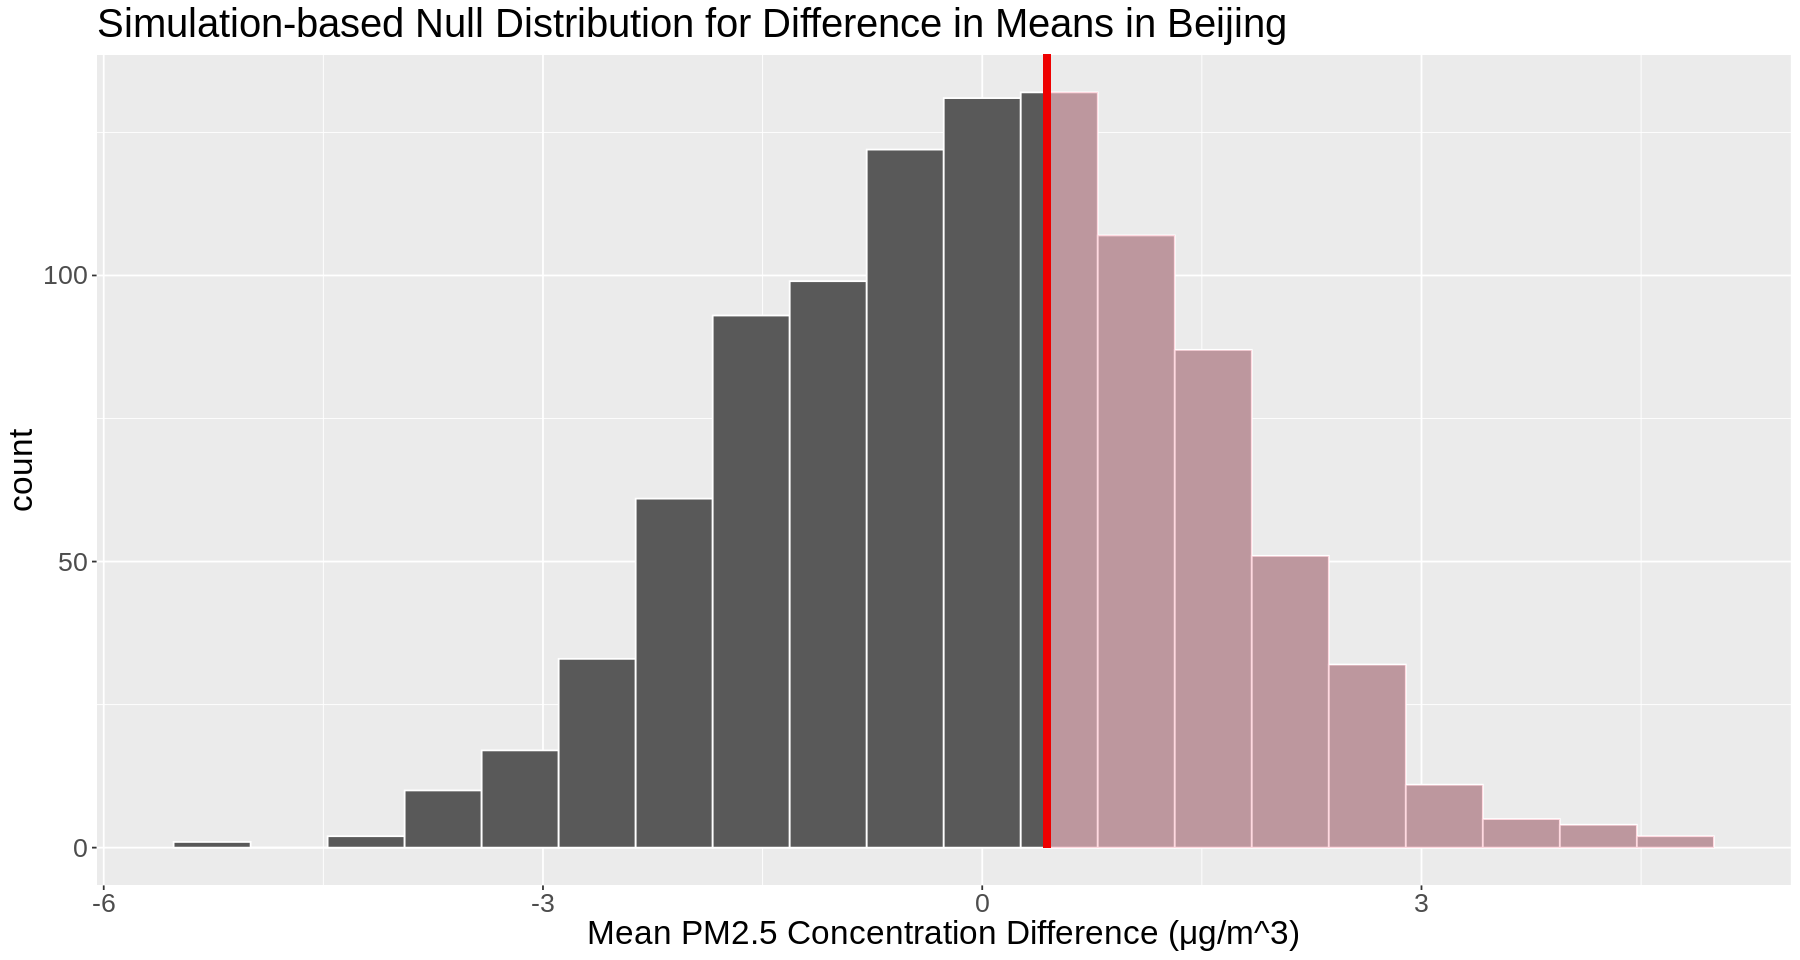

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Set seed for consistent results
set.seed(46201)

## BEIJING
# Null distribution for mean differences in Beijing
BJ_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))
head(BJ_null_diff_in_means)

# p-value for hypothesis test
BJ_null_diff_in_means_p <- BJ_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs, direction = "right")
# BJ_null_diff_in_means_p

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic BJ_PM2.5_mean_diff_obs
BJ_null_diff_in_means_plot <- BJ_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$BJ_PM2.5_mean_diff_obs, direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Beijing") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size=20))
BJ_null_diff_in_means_plot

## 4. Discussion

### 4.4.1 

## References

<!-- - Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236 doi:10.1002/2016JD024877 -->
- Liang, X. (2016). PM 2.5 data reliability, consistency, and air quality assessment in five chinese cities CONSISTENCY IN CHINA'S PM 2.5 DATA doi:10.1002/2016JD024877
- “California Air Resources Board.” Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=For%20PM2.,symptoms%2C%20and%20restricted%20activity%20days.
- Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E. (2015). China's energy crossroads: Forging a new energy and environmental balance. Project Muse. 